<a href="https://colab.research.google.com/github/AnIsAsPe/Aprendizaje-por-Refuerzo/blob/main/Gesti%C3%B3n_de_una_red_el%C3%A9ctrica_mediante_Aprendizaje_por_refuerzo_v0_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instalar [pymgrid](https://github.com/Total-RD/pymgrid)

In [1]:
!pip install git+https://github.com/Total-RD/pymgrid/

  Cloning https://github.com/Total-RD/pymgrid/ to /tmp/pip-req-build-cpr86ypv
  Running command git clone -q https://github.com/Total-RD/pymgrid/ /tmp/pip-req-build-cpr86ypv
  Created wheel for pymgrid: filename=pymgrid-0.1.0-cp37-none-any.whl size=3424180 sha256=90083c1930f73694166b450029205b468eea6661b7593f8fdd4b8b8569923684
  Stored in directory: /tmp/pip-ephem-wheel-cache-2l3sns7n/wheels/b9/cd/f9/5ebf7c874ff90d3fa2c288536524ec639b3aa2be1af92d6fb7
Successfully built pymgrid


In [2]:
import sys
from pymgrid import MicrogridGenerator as mg
from pymgrid.Environments.pymgrid_cspla import MicroGridEnv # para generar un ambiente en OpenAI Gym
import matplotlib.pyplot as plt
import numpy as np
import os
import time

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Selección de arquitectura de la microrred

In [3]:
env = mg.MicrogridGenerator(nb_microgrid=20, random_seed = 7)
env.generate_microgrid(verbose = False)

for i in range(env.nb_microgrids):
    
    print("Microgrid {} architecture: {}".format(int(i), str(env.microgrids[i].architecture)))


Microgrid 0 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 0}
Microgrid 1 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microgrid 2 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microgrid 3 architecture: {'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}
Microgrid 4 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microgrid 5 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 0}
Microgrid 6 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microgrid 7 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microgrid 8 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microgrid 9 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 0}
Microgrid 10 architecture: {'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}
Microgrid 11 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microgrid 12 architecture: {'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}
Microgrid 13 architecture: {'PV': 1

0.26446495654653884


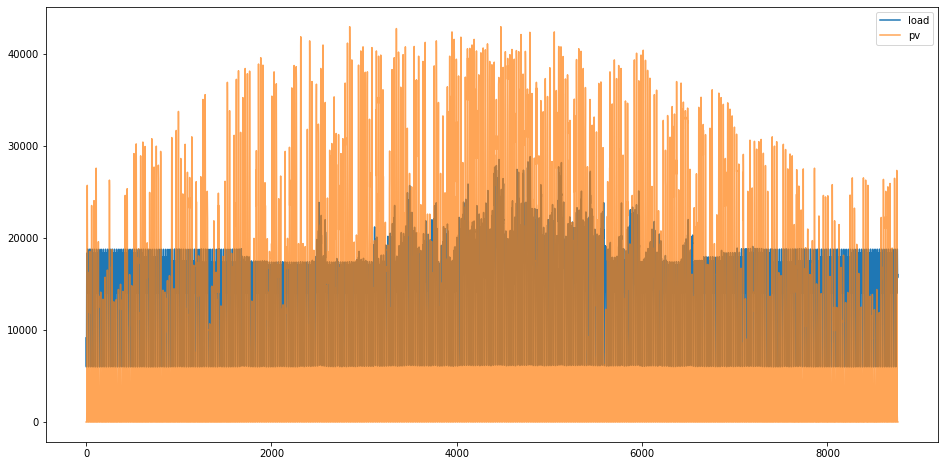

In [4]:
red = env.microgrids[19]

print(red.battery.soc)

plt.figure(figsize = (16, 8))
red.set_horizon(9000)
plt.plot(red.forecast_load(), label='load')
plt.plot(red.forecast_pv(), label='pv', alpha=.7)
plt.legend()
plt.show()

In [5]:
red.print_info()

Microgrid parameters


,load,cost_loss_load,cost_overgeneration,cost_co2,PV_rated_power,battery_soc_0,battery_power_charge,battery_power_discharge,battery_capacity,battery_efficiency,battery_soc_min,battery_soc_max,battery_cost_cycle,genset_polynom_order,genset_polynom_0,genset_polynom_1,genset_polynom_2,genset_rated_power,genset_pmin,genset_pmax,fuel_cost,genset_co2
0,28839,10,1,0.1,42970.11,0.264465,14536,14536,58143,0.9,0.2,1,0.02,3,2.661138,0.859693,0.026779,32044,0.05,0.9,0.4,2


Architecture:
{'PV': 1, 'battery': 1, 'genset': 1, 'grid': 0}
Actions: 
dict_keys(['load', 'pv_consummed', 'pv_curtailed', 'pv', 'battery_charge', 'battery_discharge', 'genset'])
Control dictionnary:
['load', 'pv_consummed', 'pv_curtailed', 'pv', 'battery_charge', 'battery_discharge', 'genset']
Status: 
dict_keys(['load', 'hour', 'pv', 'battery_soc', 'capa_to_charge', 'capa_to_discharge'])
Has run mpc baseline:
False
Has run rule based baseline:
False


In [6]:
red.print_load_pv()

Load


PV


# Componentes de la red


In [7]:
red.reset()

**Consumo**

In [8]:
red.load   # variable aleatoria en función del tiempo

9144.480373144106

In [9]:
red.load 

9144.480373144106

**Batería**

In [10]:
red.battery.capa_to_charge # cantidad de energía que la batería puede cargar antes de tener carga completa

47518.0

In [11]:
red.battery.capa_to_discharge   # cantidad de energía disponible antes de estar totalmente descargada

3373.4

In [12]:
# Carga máxima
red.battery.p_charge_max


14536

In [13]:
# Descarga máxima
red.battery.p_discharge_max

14536

In [14]:
#Estado de la carga
red.battery.soc

0.26446495654653884

In [15]:
#Estado de carga máxima
red.battery.soc_max

1

In [16]:
#Estado de carga mínima
red.battery.soc_min

0.2

In [17]:
#Eficiencia de la batería
red.battery.efficiency

0.9

**Generador de combustibles fósiles (genset)**

In [18]:
#Potencia máxima del generador
red.genset.rated_power

32044

In [19]:
# Potencia minima de operacion (kW)
red.genset.p_min

0.05

In [20]:
# Potencia máxima de operacion (kW)
red.genset.p_max

0.9

In [21]:
# Costo del combustible por KWh. 
red.genset.fuel_cost

0.4

**Generación fotovoltaica (pv)**

In [22]:
red.pv # variable aleatoria

0.0

# Dinamica del sistema
¿cómo los estados evolucionan en función del tiempo?
-estados
-acciones
-variables aleatorias

¿cómo calculamos la función de ganancia/perdida en cada transición?

Simularemos la operacion en un horizonte determinado

##  Variables de estado

El estado de carga de la batería y la demanda neta del sistema (el consumo - generacion de energía renovable)

In [23]:
  pv = red.pv                 
  load = red.load          
  demanda_neta= load - pv 

print('La demanda neta actual es {:0.2f} kWh y la capcidad de la batería es {}'.format(demanda_neta, red.battery.soc))

La demanda neta actual es 9144.48 kWh y la capcidad de la batería es 0.26446495654653884


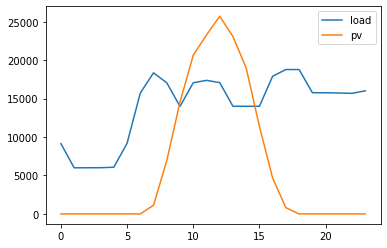

In [24]:
red.set_horizon(24)
plt.plot(red.forecast_load(), label='load')
plt.plot(red.forecast_pv(), label='pv')
plt.legend()
plt.show()

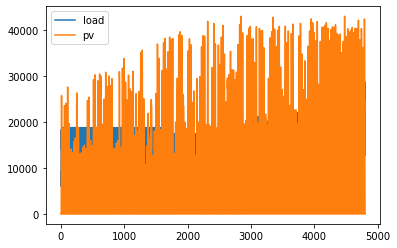

In [25]:
red.set_horizon(24*200)
plt.plot(red.forecast_load(), label='load')
plt.plot(red.forecast_pv(), label='pv')
plt.legend()
plt.show()

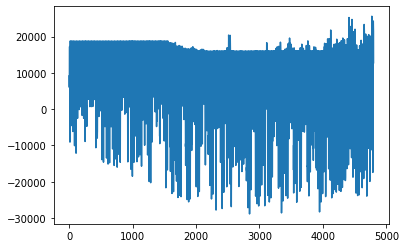

In [26]:
demanda_neta = red.forecast_load() - red.forecast_pv()
plt.plot(demanda_neta)

In [27]:
def init_qtable(red, nb_action):
    #recibe en entorno y el número de acciones
    red.set_horizon(9000)
    net_load = red.forecast_load() - red.forecast_pv()   #consumo y  pv del siguiente día
    state = []                                           #lista para guardar los estados
    Q = {}                                               #diccionario para guardar los estados

    for i in range(int(net_load.min()-1),int(net_load.max()+2)):  #ciclo entre la demanda neta minima y máxima
        
        for j in np.arange(round(red.battery.soc_min-0.1,1),round(red.battery.soc_max+0.2,1),0.1):  #ciclo de carga de la batería
  
            j = round(j,1)
            state.append((i,j))            #  demanda neta y estado de la batería

    #Iniciamos el estado Q(s,a) en cero
    for s in state:

        Q[s] = {}                            

        for a in range(nb_action):

            Q[s][a] = 0

    return Q

## Definición de las acciones

In [28]:
red.get_control_dict()  # con este diccionario podemos interactuar con la microrred

['load',
 'pv_consummed',
 'pv_curtailed',
 'pv',
 'battery_charge',
 'battery_discharge',
 'genset']

In [43]:
# accion 0: cargar batería
# accion 1: descargar batería
# acción 2: generación no renovable (genset)

def actions_agent(accion):

  pv = red.pv                 # generación fotovoltaica
  load = red.load          
  demanda_neta= load - pv 

  capa_to_charge = red.battery.capa_to_charge
  p_charge_max = red.battery.p_charge_max
  p_charge = max(0, min(-demanda_neta, capa_to_charge, p_charge_max)) 

  capa_to_discharge = red.battery.capa_to_discharge
  p_discharge_max = red.battery.p_discharge_max
  p_discharge = max(0, min(demanda_neta, capa_to_discharge, p_discharge_max))
  control_dic ={}
  if accion == 0:   # Cargar batería

        if p_charge > 0:

            control_dict= {'pv_consumed': min(pv, load),
                           'battery_charge': p_charge,
                           'battery_discharge': 0,
                           'genset': max(0,pv - min(pv,load) - p_charge)
                            }
                          
        else:
            control_dict= {'pv_consumed': min(pv, load),
                           'battery_charge': demanda_neta,
                           'battery_discharge': 0,
                           'genset': max(0,pv - min(pv,load) - p_charge)
                          }
  elif accion == 1:   # Descargar bateria

        if p_discharge > 0:
        
            control_dict = {'pv_consummed': min(pv,load),
                            'battery_charge': 0,
                            'battery_discharge': p_discharge,
                            'genset': max(0, load - min(pv,load) - p_discharge)
                           }
        else:
            
            control_dict = {'pv_consummed': min(pv,load),
                            'battery_charge': 0,
                            'battery_discharge': demanda_neta,
                            'genset': max(0,load - min(pv,load) - p_discharge),
                           }
  elif accion == 2:  #Generación no renovable (genset)
      
        control_dict = {'pv_consummed': min(pv,load),
                        'battery_charge': 0,
                        'battery_discharge': 0,
                        'genset': abs(demanda_neta),
                       }


  return control_dict

In [30]:
red.reset()

In [31]:
red.battery.soc

0.26446495654653884

In [32]:
red.run({'pv_consumed': 0,
         'battery_charge': 20000,
         'battery_discharge': 0,
         'genset': 0})

{'battery_soc': 0.4894688263159006,
 'capa_to_charge': 32982.01559057177,
 'capa_to_discharge': 15147.527371636867,
 'hour': 0,
 'load': 5999.400218085632,
 'pv': 0.0}

In [33]:
red.battery.soc

0.4894688263159006

# Estrategia descendiente codiciosa (Greedy decreasing strategy )

Programación dinámica

dilema explotacion-exploracion 

[Referencia](https://en.wikipedia.org/wiki/Multi-armed_bandit) 



In [34]:
def espilon_decreasing_greedy(action, epsilon, nb_action): 
  '''A partir de la acción de entrada, se decide si se sigue con la misma acción
  o se elige otra'''
  
  p = np.random.random()
  
  if p < (1 - epsilon):
        randomm=0
        return action, randomm

  else: 
        randomm=1
        return np.random.choice(nb_action), randomm     ### que es nb_action

Función para diminuir y actualizar epsilon

In [35]:
def update_epsilon(epsilon):
  
    
    epsilon = epsilon - epsilon *0.01  #se cambión 0.2 por 0.1 para hacer más lento el descenso de epsilon
    
    if epsilon < 0.1:
        
        epsilon = 0.1
    
    return epsilon

In [36]:
def max_dict(d):

    max_key = None
    max_val = float('-inf')


    for k,v in d.items():

        if v > max_val:

            max_val = v
            max_key = k

    return max_key, max_val

In [37]:
def change_name_action(idx):
    
    # acción 0: cargar batería
    # acción 1: descargar batería
    # acción 2: generación no renovable (genset)

    
    if idx == 0:
        action_name = "carga"
    elif idx == 1:
        action_name = "descarga"
    else:
        action_name = "generación no renovable"
    
    return action_name

In [38]:
def print_welcome(idx):
    
    if idx == 0:
        print("------------------------------------")
        print("|             WELCOME              |")
        print("------------------------------------")
    elif idx == 1:
        
        print("t -     STATE  -  ACTION - COST")
        print("================================")
    

# Función del Agente


In [39]:
def training_Q_Learning(mg,horizon):


    nb_action = 3                             #total de acciones
    Q = init_qtable(mg, nb_action)    #inicializar tabla de estados
    nb_state = len(Q)         #episodio
    nb_episode = 100
    alpha = 0.1        
    epsilon = 0.99
    gamma = 0.99
    
    record_cost = []     # función de pérdida
    t0 = time.time()
    t = t0
    print_training = "Training Progressing .   "
    print_welcome(0)  
    print("\n")
    for e in range(nb_episode+1):  
         # Control del prgreso del entrenamiento   #############################
        if e == 0:
            value_print="\rEpisode " + str(e) +"/" + str(nb_episode)   
            sys.stdout.write(value_print)   
            sys.stdout.flush( )              
        else:      
            now = time.time()
            if e == 1 or e == 50 or e == 100 or e == 200 or e == 300 or e == 400  or e == 450  or e == 485 or e == nb_episode-5:
                diff_time_t = now - t 
                total_time = (nb_episode+1) * diff_time_t           
            now = time.time()           
            diff_time = now - t0
            time_remaining = total_time - diff_time           
            t = time.time()
        if e % 10 == 0:       
            if print_training == "Training Progressing .   ":                
                print_training = "Training Progressing ..  "                
            elif print_training == "Training Progressing ..  ":            
                print_training = "Training Progressing ... "           
            else:            
                print_training = "Training Progressing .   "

        value_print="\r"+ print_training +"Episode " + str(e) +"/" + str(nb_episode) 
        sys.stdout.write(value_print) 
        sys.stdout.flush()   
        ###########################################################################    
        episode_cost = 0                  # Costo
        mg.reset()
        
        # Calcula las variables de estado
        net_load = round(mg.load - mg.pv)
        soc = round(mg.battery.soc,1)
        s = (net_load, soc)
        a = max_dict(Q[s])[0]    # Escoje la accion con el valor más grande del diccionario Q
        a, randomm = espilon_decreasing_greedy(a, epsilon, nb_action)  #estrategia de gradiente codicioso
               
        for i in range (horizon):
            
            action = actions_agent(a)     #elige la acción
            status = mg.run(action)       #run es equivalente a step() en OpenAI Gym pero toma por argumento un diccionario
            r = -mg.get_cost()            # guarda el costo de esa acción
            episode_cost += mg.get_cost() #lo suma al costo del episodio 
            net_load = round(mg.load - mg.pv)
            soc = round(mg.battery.soc,1)
            s_ = (net_load, soc)          #guarda el estado
            a_ = max_dict(Q[s_])[0]       # escoje la clave con el valor más grande del diccionario Q  ERROR
            
            if i == horizon-1:  
                
                Q[s][a] += alpha*(r - Q[s][a])    
      
            else:
             
                old_Q = Q[s][a]
                target = r + gamma*Q[s_][a_]
                td_error = target - Q[s][a]
                Q[s][a] = (1-alpha) * Q[s][a] + alpha * td_error
                
            s, a = s_, a_
       
        epsilon = update_epsilon(epsilon)
        
    return Q

In [40]:
def testing_Q_Learning(mg, Q, horizon):
    
    mg.reset()
    net_load = round(mg.load - mg.pv)
    soc = round(mg.battery.soc,1)
    s = (net_load, soc)
    a = max_dict(Q[s])[0]
    total_cost = 0
    print_welcome(1)
    for i in range (horizon):

        action_name = change_name_action(a)
        action = actions_agent(a)
        status = mg.run(action)
        cost = mg.get_cost()
        total_cost += cost
        if i < 10:
            print(i," -",(int(net_load),soc),action_name, round(total_cost,1), "$")
        else:
            print(i,"-",(int(net_load),soc),action_name, round(total_cost,1), "$")
        net_load = round(mg.load - mg.pv)
        soc = round(mg.battery.soc,1)
        s_ = (net_load, soc)
        a_ = max_dict(Q[s_])[0]

        s, a = s_, a_

In [45]:
%time Q1 = training_Q_Learning(red,1000)

------------------------------------
|             WELCOME              |
------------------------------------


Training Progressing ... Episode 100/100CPU times: user 38.7 s, sys: 544 ms, total: 39.2 s
Wall time: 38.8 s


In [46]:
testing_Q_Learning(red,Q1, 3000)

t -     STATE  -  ACTION - COST
0  - (9144, 0.3) descarga 3530.4 $
1  - (5999, 0.2) descarga 7130.1 $
2  - (6008, 0.2) descarga 10734.7 $
3  - (6012, 0.2) generación no renovable 14342.1 $
4  - (6074, 0.2) descarga 17986.5 $
5  - (9199, 0.2) generación no renovable 23506.1 $
6  - (15736, 0.2) descarga 32947.9 $
7  - (17224, 0.2) descarga 43282.5 $
8  - (10124, 0.2) generación no renovable 49356.6 $
9  - (-573, 0.2) descarga 49356.6 $
10 - (-3584, 0.2) descarga 49356.6 $
11 - (-5908, 0.2) descarga 49356.6 $
12 - (-8638, 0.2) descarga 49356.6 $
13 - (-9082, 0.2) descarga 49356.6 $
14 - (-4981, 0.2) descarga 49356.6 $
15 - (2603, 0.2) descarga 50918.6 $
16 - (13254, 0.2) descarga 58871.2 $
17 - (17978, 0.2) descarga 69657.8 $
18 - (18790, 0.2) generación no renovable 80932.1 $
19 - (15776, 0.2) generación no renovable 90397.5 $
20 - (15767, 0.2) descarga 99857.7 $
21 - (15737, 0.2) generación no renovable 109299.8 $
22 - (15691, 0.2) descarga 118714.6 $
23 - (16021, 0.2) generación no ren